# Bollywood DataSet Exploratory Analysis
### Abeer Sethia | 220968144 | Batch 1 | Week 3 | Exercise 2

1. How many records are present in the dataset? 
2. How many movies got released in each genre? Sort number of releases in each genre 
in descending order. 
3. Which genre had highest number of releases? 
4. How many movies in each genre got released in different release times like long 
weekend, festive season, etc. (Note: Do a cross tabulation between Genre and 
ReleaseTime.) 
5. Which month of the year, maximum number movie releases are seen? (Note: Extract a 
new column called month from ReleaseDate column.) 
6. Which month of the year typically sees most releases of high budgeted movies, that is, 
movies with budget of 25 crore or more? 
7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate 
return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget. 
8. Do the movies have higher ROI if they get released on festive seasons or long 
weekend? Calculate the average ROI for different release times. 
9. Is there a correlation between box office collection and YouTube likes? Is the 
correlation positive or negative? 
10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each
genre of movies to compare. 
11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, 
YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or 
heatmap. 
12. During 2013−2015 period, highlight the genre of movies and their box office 
collection? Visualize with best fit graph. 
13. Visualize the Budget and Box office collection based on Genre. 
14. Find the distribution of movie budget for every Genre. 
15. During 2013−2015, find the number of movies released in every year. Also, visualize 
with best fit graph

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Importing and printing the dataset

In [2]:
df=pd.read_csv("bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


## 5 number summary 

In [3]:
df.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


### 1. How many records are present in the dataset? 

In [4]:
df.shape[0]

149

### 2. How many movies got released in each genre? Sort number of releases in each genre in descending order. 

In [5]:
df.Genre=df.Genre.str.strip()
df.groupby('Genre').size().sort_values(ascending=False)

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
dtype: int64

### 3. Which genre had highest number of releases?

In [6]:
maxrel=df.Genre.max()
maxrel

'Thriller'

### 4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [7]:
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


### 5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column. 
#### Adding column 'month' to see the month for release of the movie

In [8]:
df['Release Date'].str.split()

0      [18-Apr-14]
1       [4-Jan-13]
2      [18-Jul-14]
3       [4-Jan-13]
4       [4-Jul-14]
          ...     
144    [27-Feb-15]
145    [13-Mar-15]
146    [20-Mar-15]
147    [20-Mar-15]
148    [23-May-14]
Name: Release Date, Length: 149, dtype: object

In [9]:
df['Month'] = df['Release Date'].str.split('-').str[1]

In [10]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul
...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar


In [11]:
month1 = df['Month'].value_counts()
print (month1)

df['Month'].value_counts().idxmax()

Jan    20
Mar    19
May    18
Jul    16
Feb    16
Apr    11
Sep    10
Jun    10
Nov    10
Oct     9
Aug     8
Dec     2
Name: Month, dtype: int64


'Jan'

### 6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 

In [12]:
df1 = df[(df.filter(like='Budget')>25).any(axis=1)]
print (df1.MovieName)

0                         2 States
6                    Daawat-E-Ishq
7       Matru Ki Bijlee Ka Mandola
8                     Dedh Ishqiya
10                     Dishkiyaoon
                  ...             
138                           Baby
141                      Shamitabh
142                            Roy
146    Dilliwali Zaalim Girlfriend
148                  Kochadaiiyaan
Name: MovieName, Length: 62, dtype: object


### 7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.  

In [13]:
df['ROI']= (df.BoxOfficeCollection-df.Budget)/df.Budget

In [14]:
print(df.ROI)

0      1.888889
1      0.200000
2     -0.600000
3     -0.950000
4     -0.400000
         ...   
144    1.000000
145    1.469231
146   -0.625000
147    1.378000
148   -0.200000
Name: ROI, Length: 149, dtype: float64


In [15]:
df.sort_values(by='ROI',ascending = False).head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,Apr,8.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,Dec,7.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,Sep,7.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,Sep,7.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,Jun,6.240000
58,59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,Sep,5.933333
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,Oct,5.666667
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,Jul,5.500000
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,Jul,4.466667
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,Aug,4.266667


### 8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times

In [16]:
df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

### 9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative? 

In [17]:
df[['BoxOfficeCollection','YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


### 10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare. 

<Axes: xlabel='Genre', ylabel='YoutubeLikes'>

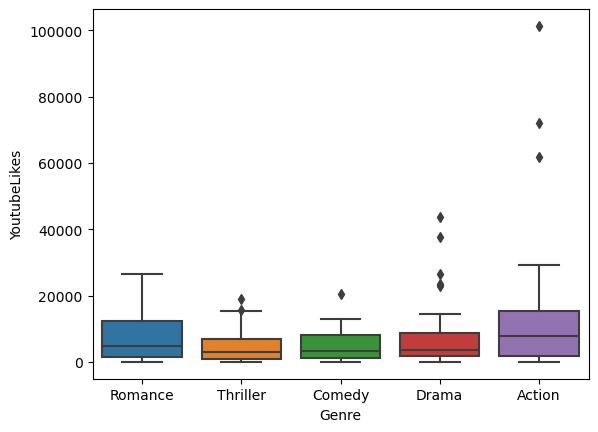

In [18]:
sns.boxplot(x='Genre',y='YoutubeLikes',data=df)

### 11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap. 

/var/folders/bf/7f2sjmd95md4m9hcdf6rwbp40000gn/T/ipykernel_2696/169530274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


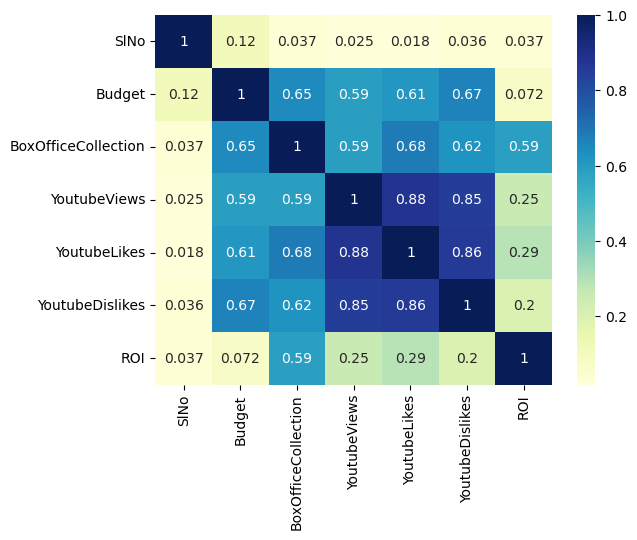

In [19]:
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

### 12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph 

/var/folders/bf/7f2sjmd95md4m9hcdf6rwbp40000gn/T/ipykernel_2696/4251660173.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genre',y='BoxOfficeCollection',data=df,ci=None)


<Axes: xlabel='Genre', ylabel='BoxOfficeCollection'>

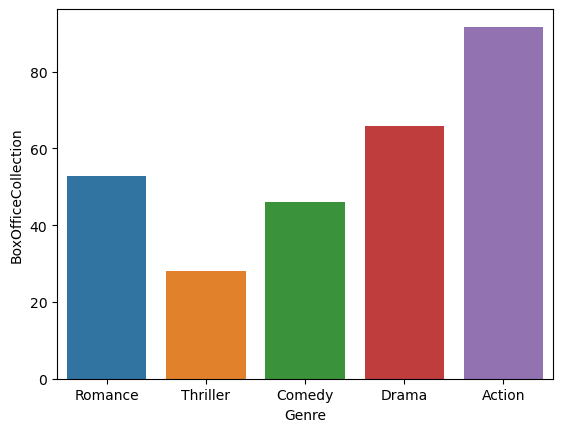

In [20]:
sns.barplot(x='Genre',y='BoxOfficeCollection',data=df,ci=None)

###  13. Visualize the Budget and Box office collection based on Genre 

<Axes: xlabel='Budget', ylabel='BoxOfficeCollection'>

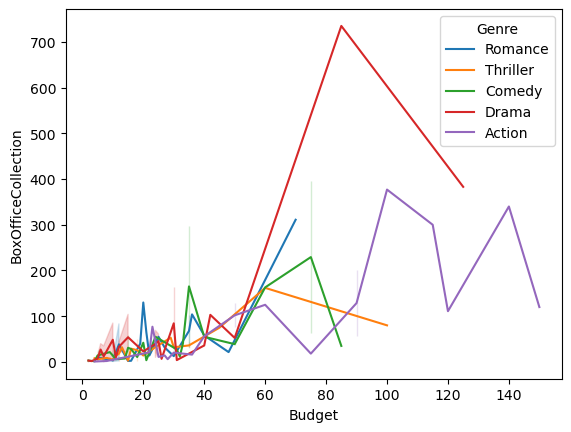

In [21]:
sns.lineplot(data=df, x="Budget", y="BoxOfficeCollection", hue="Genre")

###  14. Find the distribution of movie budget for every Genre


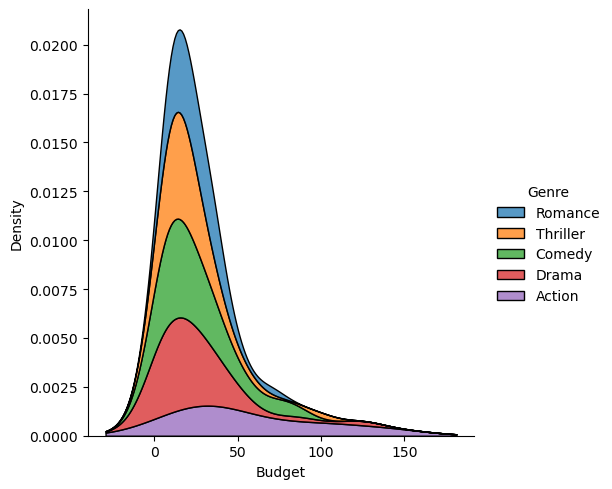

In [22]:
sns.displot(data=df, x="Budget", hue="Genre", multiple="stack", kind="kde")

### 15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [23]:
df['Release Date'].str.split()

0      [18-Apr-14]
1       [4-Jan-13]
2      [18-Jul-14]
3       [4-Jan-13]
4       [4-Jul-14]
          ...     
144    [27-Feb-15]
145    [13-Mar-15]
146    [20-Mar-15]
147    [20-Mar-15]
148    [23-May-14]
Name: Release Date, Length: 149, dtype: object

#### Adding column 'year' to see the year for release of the movie

In [24]:
df['Year'] = df['Release Date'].str.split('-').str[2]

In [25]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI,Year
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889,14
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.200000,13
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.600000,14
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.950000,13
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.400000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb,1.000000,15
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar,1.469231,15
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar,-0.625000,15
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar,1.378000,15


In [26]:
year1 = df['Year'].value_counts()
print (year1)

14    70
13    67
15    12
Name: Year, dtype: int64


<Axes: xlabel='Year', ylabel='Count'>

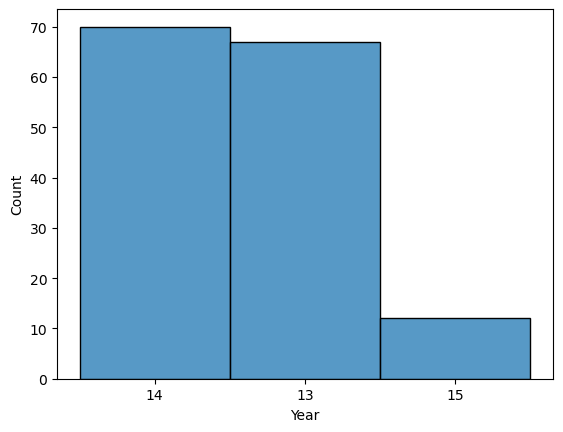

In [27]:
sns.histplot(x='Year',data=df)